# 1. Movement with constant acceleration

In [1]:
from __future__ import division, print_function, generators
import  numpy as np
import kalman as k

In [2]:
%matplotlib inline

In [ ]:
# %load kalman.py

import numpy as np
import matplotlib.pyplot as plt



def kalman_predict( A, # transition matrix 
            r, # measurement error matrix
            H, # transformation matrix from state vector to measurement
            p, # initial variance on prediction
            xkal, # estimated state vector
            xpredict, # predicted state vector
            xmeas): # measurements
    for i in range(1, xkal.shape[1]): # for each measurement do 
        # prediction: recursive formula
        xpredict[:, i] = np.dot(A, xkal[:, i - 1])
        # predict covariance  
        p = A*p*A.T
        # construct kalman gain matrix according to prediction equations
        # higher gain leads to higher influence of measurement,
        # lower gain to higher influence of predicion
        K = np.dot(p*H.T, np.linalg.inv(H*p*H.T + r))
        # construct estimate from prediction and gain 
        xkal[:, i] = xpredict[:, i] + K*(xmeas[:, i] - H*xpredict[:, i])
        # update covariance with gain
        p = (np.identity(K.shape[0]) - K) * p
    return xkal, xpredict

def plot_results(xkal, xpredict, xmeas, xtrue):
    fig1 = plt.figure()
    ax1 = plt.axes()
    plt.plot(xtrue, 'b-', label = 'True')
    plt.plot(xmeas[0].T, 'rx', label = 'Measuement')
    plt.plot(xpredict[0].T, 'g.',  label = 'Prediction')
    plt.plot(xkal[0].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('X')

    fig2 = plt.figure()
    ax2 = plt.axes()
    plt.axhline(v)
    #plt.axhline(np.mean(xmeas[1]))
    plt.plot(xpredict[1].T, 'g.',  label = 'Prediction')
    plt.plot(xmeas[1].T, 'rx', label = 'Measurement')
    plt.plot(xkal[1].T, 'ko', label = 'Kalman')
    plt.xlabel('Iteration')
    plt.ylabel('Velocity')
    return [[fig1, fig2], [ax1, ax2]]


## Free fall motion

[[  94.46332605    8.24974155  -19.85996445]
 [  97.9668519    10.56811529  -19.63918405]
 [  94.54558544   10.68890736  -20.09912354]
 [ 110.62000944   10.07398751  -19.8805482 ]
 [  85.02315485    9.82460757  -20.10672677]
 [  86.35776913   10.55215932  -20.22839253]
 [  66.79275148   10.70883916  -19.59062191]
 [  75.53725955   10.61553048  -17.85108596]
 [  49.61556922   10.25673722  -19.54058185]
 [  53.50284032    6.74045141  -19.42439027]]


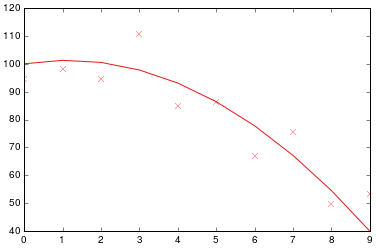

In [68]:
# number of measurements
N = 10
x0 = 100
dt = 0.2

# position, velocity and acceleration
state_vec_dim = 3

# parabola with some curvature g 
g = -20
v=10
sigma = 1
sigma3 = 1
sigma4 = 10.

xtrue4 = g  * np.linspace(0,2, N)**2 + v * np.linspace(0,2, N) + x0



xmeas4 = np.matrix(np.linspace(0, 10, N*state_vec_dim).reshape((state_vec_dim, N)))

for i in range(0, N):
    xmeas4[0,i] = np.random.normal(xtrue4[i], sigma4)
    xmeas4[1,i] = np.random.normal(v, sigma)
    xmeas4[2,i] = np.random.normal(g, sigma)
print(xmeas4.T)
plt.plot(xtrue4)
plt.plot(xmeas4[0].T, 'rx')

In [73]:
xpredict4 = np.matrix (np.linspace(0,2,N*state_vec_dim).reshape((state_vec_dim, N)))
xkal4 = np.matrix (np.linspace(0,2,N*state_vec_dim).reshape((state_vec_dim, N)))
# initial position
print(xpredict4.shape)
print(xkal4.shape)
xpredict4[:,0] = xkal4[:,0] = np.array ( [[xmeas4[0,0]], [xmeas4[1,0]], [xmeas4[2,0]] ] )
# initial variance on prediction
p4 = np.matrix ( [[20, 0, 0],
                    [0, 20, 0],
                    [0,0,20]] )
# measurement error
r4 = np.matrix([[sigma4*0.1, 0, 0],
                 [0  , 0.001*sigma3*sigma3,0],
                [0,0, sigma4*0.001]])

# prediction matrix
A4 = np.matrix ( [[1, dt, 0],
                [0, 1, dt],
                [0, 0, 1]] )
# transformation matrix (from measurement to state vector)
H4 = np.matrix ( [[1 , 0, 0],
                   [0, 0, 0],
                    [0,0,0]] )

for i in range(1,N):
    # prediction: recursive formula
    xpredict4[:,i] = np.dot(A4, xkal4[:,i-1] )
    print(xpredict4[:,i].T)
    p4 = A4*p4*A4.T
    K4 = p4*H4.T * np.linalg.inv(H4*p4*H4.T+r4)
    xkal4[:,i] = xpredict4[:,i] + K4*(xmeas4[:,i] - H4*xpredict4[:,i])
    p4 = (np.identity(state_vec_dim)-K4) * p4

(3, 10)
(3, 10)
[[ 96.11327436   4.27774866 -19.85996445]]
[[ 98.80539633   0.64586174 -19.85996445]]
[[ 94.86841067 -10.12441859 -21.06408101]]
[[ 108.61531845   14.77135938  -12.15386324]]
[[ 89.2145791  -27.70329856 -30.40004753]]
[[ 81.1272527  -38.33198028 -33.11508233]]
[[ 61.12571892 -67.34142796 -48.48833114]]
[[ 59.82201812 -54.85919076 -32.56960466]]
[[ 40.41550444 -76.46505707 -43.27054385]]


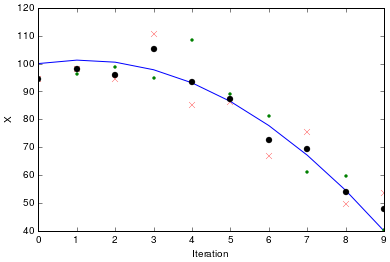

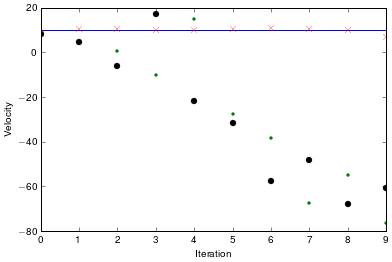

In [74]:
figs = k.plot_results()
plt.show()